# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [28]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('ggplot')



#SLOPE CALCULATION (m)
def calc_slope(xs,ys):
    return (np.mean(xs)*np.mean(ys)-np.mean(xs*ys))/(((np.mean(xs))**2)-np.mean(xs**2))

#SLOPE AND INTERCEPT(m,b)

def best_fit(xs,ys):
    print('Slope:')
    print (calc_slope(xs,ys))
    print('Intercept:')
    print (np.mean(ys)-(calc_slope(xs,ys)*np.mean(xs)))
    
    
    
#REGRESSION LINE
#Takes in slope, intercept and X vector and calculates the regression line using Y= mX+b for each point in X.
def reg_line (m, b, xs):
    return [(m*x)+b for x in xs]

#PLOTTING THE REGRESSION LINE
#plt.scatter(X,Y)
#plt.plot(X,regression_line, color='blue')


X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


Slope:
0.5575757575757568
Intercept:
6.3333333333333375


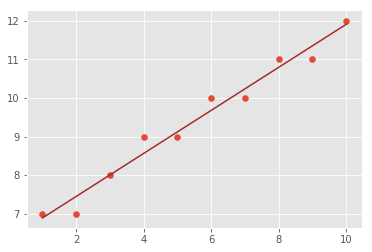

In [8]:
best_fit(X,Y)
plt.scatter(X,Y)
regression_line = reg_line(0.5575757575757568,6.3333333333333375,X)
plt.plot(X,regression_line, color='brown')

In [9]:
# R-SQUARED
def sq_err(ys_a, ys_b):
    squared_errors = []
    for number in range (len(ys_a)):
        squared_error = (ys_a[number]-ys_b[number])**2
        squared_errors.append(squared_error)
    return sum(squared_errors)



def r_squared(ys_real, ys_predicted):
    # ys_real: real values
    # ys_predicted: regression values
    
    ss_tot = []
    for number in ys_real:
        square_error = (number - ys_real.mean())**2
        ss_tot.append(square_error)
        sum_of_errors = sum(ss_tot)
    return 1 - ((sq_err(ys_real,ys_predicted))/sum_of_errors)
# 1 minus the residual sum of squares(RSS) divided by the sum of squared errors(TSS)

In [10]:
r_squared(Y,regression_line)

0.9715335169880626

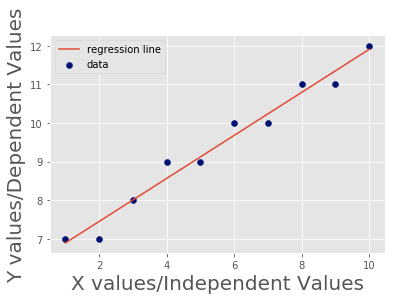

In [19]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33


plt.scatter(X,Y,color='#000F72',label='data')
plt.plot(X,regression_line, label='regression line')
plt.xlabel('X values/Independent Values',fontsize=20)
plt.ylabel('Y values/Dependent Values',fontsize=20)
plt.legend()

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

In [21]:
# Make prediction using given value and visualize on the scatter plot
x_new = 4.5
m=0.5575757575757568
b=6.3333333333333375
y_predicted = m*x_new+b
y_predicted

8.842424242424244

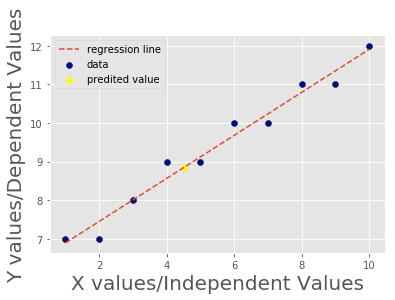

In [27]:
# Plot as above and show the predicted value
plt.scatter(X,Y,color='#000F72',label='data')
plt.plot(X,regression_line, label='regression line',linestyle='--')
plt.scatter(x_new,y_predicted,color='yellow',label='predited value')
plt.xlabel('X values/Independent Values',fontsize=20)
plt.ylabel('Y values/Dependent Values',fontsize=20)
plt.legend()

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

Slope:
5.539019232705614
Intercept:
-204.48343570637024


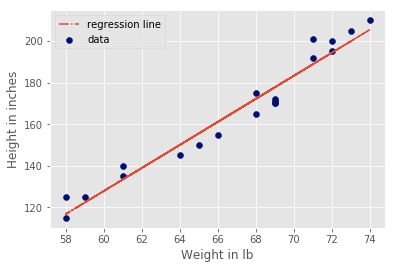

In [56]:
df = pd.read_csv('heightWeight.csv')
h_independent=df['height']
w_dependent=df['Weight']

x_levelup = h_independent
y_levelup = w_dependent


# calculating m and b
best_fit(x_levelup,y_levelup)
plt.scatter(x_levelup,y_levelup,color='#000F72',label='data')

#define m and b
m_levelup=5.539019232705614
b_levelup=-204.48343570637024

#calculate regression line values and define the regressio line
r_line_levelup = reg_line(m_levelup,b_levelup,x_levelup)

#plot the values with the regression line
plt.plot(x_levelup,r_line_levelup,label='regression line',linestyle='-.')
plt.xlabel('Weight in lb')
plt.ylabel('Height in inches')
plt.legend()


In [58]:
#calculate r_squared
r_squared(y_levelup, r_line_levelup)

0.9553099288673668

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 